# Project 5 DNN and Non-DNN Algorithms with Filled Data

In this project, I will use the same dataset in Project 3 Part 2 - pima india. I am going to preprocess the data, and then implement both DNN and non-DNN algorithms to train the model.

## Imputing the Missing Data

In [1]:
# required lib
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import numpy as np

# load the diabetes data set
diabetes = read_csv('pima-indians-diabetes.csv', header=None)
print(diabetes.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [3]:
# print out the number of examples in the data set
print (diabetes.head(10))

    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1


In [4]:
# how many blank values
print((diabetes[0:6] == 0).sum())

0    1
1    0
2    0
3    2
4    4
5    0
6    0
7    0
8    3
dtype: int64


In [5]:
# use the simple imputer to fill the missing values
from sklearn.impute import SimpleImputer
array = diabetes.values
X = array[:,0:8]
Y = array[:,8]
imp = SimpleImputer(missing_values=0, strategy='mean')
diabetes_imp = imp.fit(X[:, 0:6])
X[:, 0:6] = imp.transform(X[:, 0:6])

In [6]:
# check if there is any 0 left
print((X[0:6] == 0).sum())

0


We can see that there is no missing value - we have done handling the missing data. Now we can move to the next step: implementing a non-DNN algorithm.

## Implementing A Non-DNN Algorithm

Here, we choose to use Logistic Regression classifier.

In [7]:
# specify Logistic Regression classifier
# with the max_iter = 1000
# otherwise it will have warning (maximum iteration limit reached)
clf = LogisticRegression(max_iter=1000)

In [8]:
# We split the data into training and test set
test_size = 0.33
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Accuracy of the model
print('Accuracy: %.3f%%' % (clf.score(X_test, Y_test)*100.0))

Accuracy: 77.953%


After we ran the model, we got the accuracy of 77.953% which isn't too bad. We set the max iteration to be 1000. If the max iteration is larger, will we get better result? Let's try that.

In [11]:
clf_2 = LogisticRegression(max_iter=10000)

# We split the data into training and test set
test_size = 0.33
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
clf_2.fit(X_train, Y_train)

# Accuracy of the model
print('Accuracy: %.3f%%' % (clf_2.score(X_test, Y_test)*100.0))

Accuracy: 77.953%


The accuracy didn't change. We can take a guess that the cost function will no longer change because it has already converged. To prove this assumption, let's tune the number of iterations and plot the graph.

In [23]:
Accuracy = []
Iteration = []
for i in range(100, 2000, 100):
    Iteration.append(i)
    
    clf_tmp = LogisticRegression(max_iter=i)

    # We split the data into training and test set
    test_size = 0.33
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
    clf_tmp.fit(X_train, Y_train)

    # Accuracy of the model
    acc = clf_tmp.score(X_test, Y_test)*100.0
    Accuracy.append(acc) 

/home/csuser/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


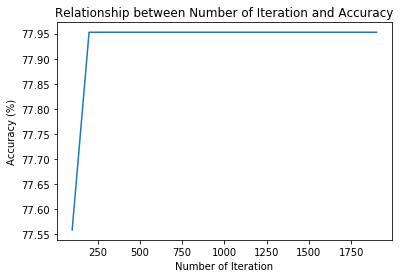

In [24]:
plt.plot(Iteration, Accuracy)
plt.title("Relationship between Number of Iteration and Accuracy")
plt.xlabel("Number of Iteration")
plt.ylabel("Accuracy (%)")
plt.show()

We can tell that for the first few times with small number of iterations, the model didn't have the best accuracy. When it reached some value of max iteration, the accuracy won't change anymore.

After we know the effect of this hyperparameter, what about the hyperparameter of test size?

In [32]:
Accuracy = []
size = []
for i in range(10, 70, 1):
    size.append(i / 100)
    
    clf_tmp = LogisticRegression(max_iter=500)

    # We split the data into training and test set
    test_size = i / 100
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
    clf_tmp.fit(X_train, Y_train)

    # Accuracy of the model
    acc = clf_tmp.score(X_test, Y_test)*100.0
    Accuracy.append(acc) 

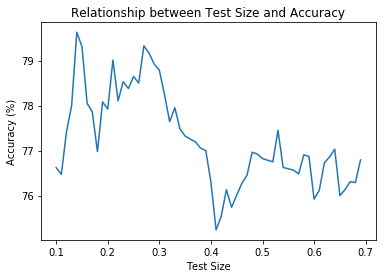

In [33]:
plt.plot(size, Accuracy)
plt.title("Relationship between Test Size and Accuracy")
plt.xlabel("Test Size")
plt.ylabel("Accuracy (%)")
plt.show()

In [39]:
index = Accuracy.index(max(Accuracy))
print("The highest accuracy is reached when the test size is: %.2f." % size[index])
print("The highest accuracy is: %.3f%%." % Accuracy[index])

The highest accuracy is reached when the test size is: 0.14.
The highest accuracy is: 79.630%.


The highest accuracy is reached when the test size is 0.14, and the highest accuracy is 79.630%. Thus, the test size does impact the results. This is reasonable because with different training and testing data, the model will be trained differently and as a result, the accuracy will be different.

We are done playing with the non-DNN algorithm,and now we can move to the DNN algorithm.

## Implementing A DNN Algorithm

In [40]:
# Import tensorflow library
import tensorflow as tf

# split the data with the best ratio we got from last part
# (this ratio is only a reference - it could not be the best ratio for DNN)
test_size = 0.14
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)

# Normalize the train dataset
X_train = tf.keras.utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = tf.keras.utils.normalize(X_test, axis=1)

/home/csuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/csuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/csuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/csuser/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [45]:
# Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(8, activation=tf.nn.sigmoid))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=Y_train, verbose=1, epochs=100) # Start training process

Epoch 1/100
660/660 [==============================] - 0s 154us/sample - loss: 0.6855 - acc: 0.5470
Epoch 2/100
660/660 [==============================] - 0s 33us/sample - loss: 0.6716 - acc: 0.6123
Epoch 3/100
660/660 [==============================] - 0s 34us/sample - loss: 0.6602 - acc: 0.6449
Epoch 4/100
660/660 [==============================] - 0s 33us/sample - loss: 0.6533 - acc: 0.6515
Epoch 5/100
660/660 [==============================] - 0s 33us/sample - loss: 0.6492 - acc: 0.6515
Epoch 6/100
660/660 [==============================] - 0s 31us/sample - loss: 0.6476 - acc: 0.6515
Epoch 7/100
660/660 [==============================] - 0s 32us/sample - loss: 0.6463 - acc: 0.6515
Epoch 8/100
660/660 [==============================] - 0s 31us/sample - loss: 0.6457 - acc: 0.6515
Epoch 9/100
660/660 [==============================] - 0s 33us/sample - loss: 0.6447 - acc: 0.6515
Epoch 10/100
660/660 [==============================] - 0s 31us/sample - loss: 0.6439 - acc: 0.6515
Epoch 11

660/660 [==============================] - 0s 33us/sample - loss: 0.5541 - acc: 0.7193
Epoch 84/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5562 - acc: 0.7201
Epoch 85/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5555 - acc: 0.7119
Epoch 86/100
660/660 [==============================] - 0s 31us/sample - loss: 0.5533 - acc: 0.7142
Epoch 87/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5519 - acc: 0.7197
Epoch 88/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5538 - acc: 0.7212
Epoch 89/100
660/660 [==============================] - 0s 31us/sample - loss: 0.5520 - acc: 0.7201
Epoch 90/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5511 - acc: 0.7182
Epoch 91/100
660/660 [==============================] - 0s 32us/sample - loss: 0.5517 - acc: 0.7208
Epoch 92/100
660/660 [==============================] - 0s 31us/sample - loss: 0.5519 - acc: 0.7189
Epoch 93/100


In [46]:
# Evaluate the keras model
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

108/108 [==============================] - 0s 275us/sample - loss: 0.5836 - acc: 0.7176
Accuracy: 71.76


The training accuracy is 71.25% and the testing accuracy is 71.76% which are lower than the Logistic Regression classifier. Let's try to tune the hyperparameter, and see if the results for DNN will be better.

In [83]:
# Build the model object
model_tmp = tf.keras.models.Sequential()
# Add the Flatten Layer
model_tmp.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model_tmp.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
# Build the output layer
model_tmp.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))

# Compile the model
model_tmp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model_tmp.fit(x=X_train, y=Y_train, verbose=1, epochs=100) # Start training process

# Evaluate the keras model
_, accuracy = model_tmp.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
660/660 [==============================] - 0s 381us/sample - loss: 0.6747 - acc: 0.6228
Epoch 2/100
660/660 [==============================] - 0s 60us/sample - loss: 0.6464 - acc: 0.6515
Epoch 3/100
660/660 [==============================] - 0s 62us/sample - loss: 0.6443 - acc: 0.6515
Epoch 4/100
660/660 [==============================] - 0s 59us/sample - loss: 0.6409 - acc: 0.6515
Epoch 5/100
660/660 [==============================] - 0s 60us/sample - loss: 0.6388 - acc: 0.6515
Epoch 6/100
660/660 [==============================] - 0s 59us/sample - loss: 0.6356 - acc: 0.6515
Epoch 7/100
660/660 [==============================] - 0s 60us/sample - loss: 0.6324 - acc: 0.6515
Epoch 8/100
660/660 [==============================] - 0s 60us/sample - loss: 0.6301 - acc: 0.6515
Epoch 9/100
660/660 [==============================] - 0s 61us/sample - loss: 0.6258 - acc: 0.6515
Epoch 10/100
660/660 [==============================] - 0s 60us/sample - loss: 0.6228 - acc: 0.6515
Epoch 11

660/660 [==============================] - 0s 60us/sample - loss: 0.5483 - acc: 0.7164
Epoch 84/100
660/660 [==============================] - 0s 60us/sample - loss: 0.5443 - acc: 0.7179
Epoch 85/100
660/660 [==============================] - 0s 59us/sample - loss: 0.5496 - acc: 0.7160
Epoch 86/100
660/660 [==============================] - 0s 59us/sample - loss: 0.5484 - acc: 0.7054
Epoch 87/100
660/660 [==============================] - 0s 62us/sample - loss: 0.5502 - acc: 0.7153
Epoch 88/100
660/660 [==============================] - 0s 61us/sample - loss: 0.5509 - acc: 0.7217
Epoch 89/100
660/660 [==============================] - 0s 60us/sample - loss: 0.5492 - acc: 0.7245
Epoch 90/100
660/660 [==============================] - 0s 61us/sample - loss: 0.5473 - acc: 0.7174
Epoch 91/100
660/660 [==============================] - 0s 62us/sample - loss: 0.5443 - acc: 0.7238
Epoch 92/100
660/660 [==============================] - 0s 59us/sample - loss: 0.5429 - acc: 0.7279
Epoch 93/100


I have tried several hyperparameters on the DNN, but the highest accuracy I got was around 74% which was is lower than the non-DNN algorithm. I guess maybe there are too few data for the DNN.

## Confusion Matrix for Both Methods

In [84]:
import seaborn as sns
from sklearn import metrics

### Logistic Regression Classifier

In [101]:
clf_final = LogisticRegression(max_iter=500)

# We split the data into training and test set
test_size = 0.14
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=test_size, random_state=1)
clf_final.fit(X_train, Y_train)

predictions_non_DNN = clf_final.predict(X_test)
score_non_DNN = clf_final.score(X_test, Y_test)

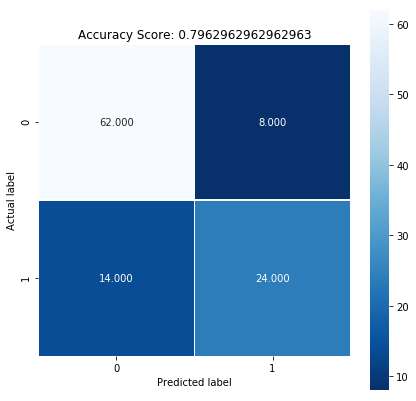

In [103]:
cm_non_DNN = metrics.confusion_matrix(Y_test, predictions_non_DNN)
plt.figure(figsize=(7,7))
sns.heatmap(cm_non_DNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_non_DNN)
plt.title(all_sample_title, size = 12);

### DNN

In [112]:
prediction_DNN = model.predict_classes(X_test)
cm_DNN = metrics.confusion_matrix(Y_test, prediction_DNN)

108/108 [==============================] - 0s 49us/sample - loss: 84.2414 - acc: 0.6794


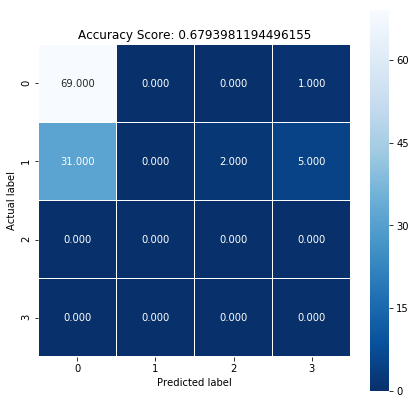

In [111]:
cm_DNN = metrics.confusion_matrix(Y_test, prediction_DNN)
plt.figure(figsize=(7,7))
sns.heatmap(cm_DNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
_, accuracy = model.evaluate(X_test, Y_test)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 12);